In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

In [106]:
df = pd.read_csv("../data/feature_selection_heart_disease.csv")

In [107]:
df.head()

,thalach,cp,ca,oldpeak,thal,exang,num
0,150,1,0.0,2.3,6.0,0,0
1,108,4,3.0,1.5,3.0,1,1
2,129,4,2.0,2.6,7.0,1,1
3,187,3,0.0,3.5,3.0,0,0
4,172,2,0.0,1.4,3.0,0,0


In [108]:
df.shape

(303, 7)

In [109]:
df['num'].value_counts()
# 0 -> No Heart Disease
# 1 -> Heart Disease

num
0    164
1    139
Name: count, dtype: int64

In [110]:
X = df.drop('num', axis=1)
Y = df['num']

In [111]:
X

,thalach,cp,ca,oldpeak,thal,exang
0,150,1,0.0,2.3,6.0,0
1,108,4,3.0,1.5,3.0,1
2,129,4,2.0,2.6,7.0,1
3,187,3,0.0,3.5,3.0,0
4,172,2,0.0,1.4,3.0,0
...,...,...,...,...,...,...
298,132,1,0.0,1.2,7.0,0
299,141,4,2.0,3.4,7.0,0
300,115,4,1.0,1.2,7.0,1
301,174,2,1.0,0.0,3.0,0


In [112]:
Y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Logistic Regression Model

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, Y_train)
lr_Y_pred = lr.predict(X_test_scaled)
lr_Y_prob = lr.predict_proba(X_test_scaled)[:, 1]

In [116]:
lr_accuracy = accuracy_score(Y_test, lr_Y_pred)
print("Accuracy for Logistic Regression:",lr_accuracy)
lr_precision = precision_score(Y_test, lr_Y_pred, zero_division=0)
print("Precision for Logistic Regression:",lr_precision)
lr_recall = recall_score(Y_test, lr_Y_pred, zero_division=0)
print("Recall for Logistic Regression:",lr_recall)
lr_f1 = f1_score(Y_test, lr_Y_pred, zero_division=0)
print("F1 Score for Logistic Regression:",lr_f1)
print("Classification Report:")
print(classification_report(Y_test, lr_Y_pred, zero_division=0))

Accuracy for Logistic Regression: 0.9180327868852459
Precision for Logistic Regression: 0.9354838709677419
Recall for Logistic Regression: 0.90625
F1 Score for Logistic Regression: 0.9206349206349206
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### Decision Tree Model

In [117]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
dt_Y_pred = dt.predict(X_test)
dt_Y_prob = dt.predict_proba(X_test)[:, 1]

In [118]:
dt_accuracy = accuracy_score(Y_test, dt_Y_pred)
print("Accuracy for Decision Tree:",dt_accuracy)
dt_precision = precision_score(Y_test, dt_Y_pred, zero_division=0)
print("Precision for Decision Tree:",dt_precision)
dt_recall = recall_score(Y_test, dt_Y_pred, zero_division=0)
print("Recall for Decision Tree:",dt_recall)
dt_f1 = f1_score(Y_test, dt_Y_pred, zero_division=0)
print("F1 Score for Decision Tree:",dt_f1)
print("Classification Report:")
print(classification_report(Y_test, dt_Y_pred, zero_division=0))

Accuracy for Decision Tree: 0.7704918032786885
Precision for Decision Tree: 0.8
Recall for Decision Tree: 0.75
F1 Score for Decision Tree: 0.7741935483870968
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.80      0.75      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### Random Forest Model

In [119]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
rf_Y_pred = rf.predict(X_test)
rf_Y_prob = rf.predict_proba(X_test)[:, 1]

In [120]:
rf_accuracy = accuracy_score(Y_test, rf_Y_pred)
print("Accuracy for Random Forest:",rf_accuracy)
rf_precision = precision_score(Y_test, rf_Y_pred, zero_division=0)
print("Precision for Random Forest:",rf_precision)
rf_recall = recall_score(Y_test, rf_Y_pred, zero_division=0)
print("Recall for Random Forest:",rf_recall)
rf_f1 = f1_score(Y_test, rf_Y_pred, zero_division=0)
print("F1 Score for Random Forest:",rf_f1)
print("Classification Report:")
print(classification_report(Y_test, rf_Y_pred, zero_division=0))

Accuracy for Random Forest: 0.8360655737704918
Precision for Random Forest: 0.8666666666666667
Recall for Random Forest: 0.8125
F1 Score for Random Forest: 0.8387096774193549
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Support Vector Machine (SVM) Model

In [121]:
svm = LogisticRegression(random_state=42)
svm.fit(X_train_scaled, Y_train)
svm_Y_pred = svm.predict(X_test_scaled)
svm_Y_prob = svm.predict_proba(X_test_scaled)[:, 1]

In [122]:
svm_accuracy = accuracy_score(Y_test, svm_Y_pred)
print("Accuracy for SVM:",svm_accuracy)
svm_precision = precision_score(Y_test, svm_Y_pred, zero_division=0)
print("Precision for SVM:",svm_precision)
svm_recall = recall_score(Y_test, svm_Y_pred, zero_division=0)
print("Recall for SVM:",svm_recall)
svm_f1 = f1_score(Y_test, svm_Y_pred, zero_division=0)
print("F1 Score for SVM:",svm_f1)
print("Classification Report:")
print(classification_report(Y_test, svm_Y_pred, zero_division=0))

Accuracy for SVM: 0.9180327868852459
Precision for SVM: 0.9354838709677419
Recall for SVM: 0.90625
F1 Score for SVM: 0.9206349206349206
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### ROC Curve & AUC Score

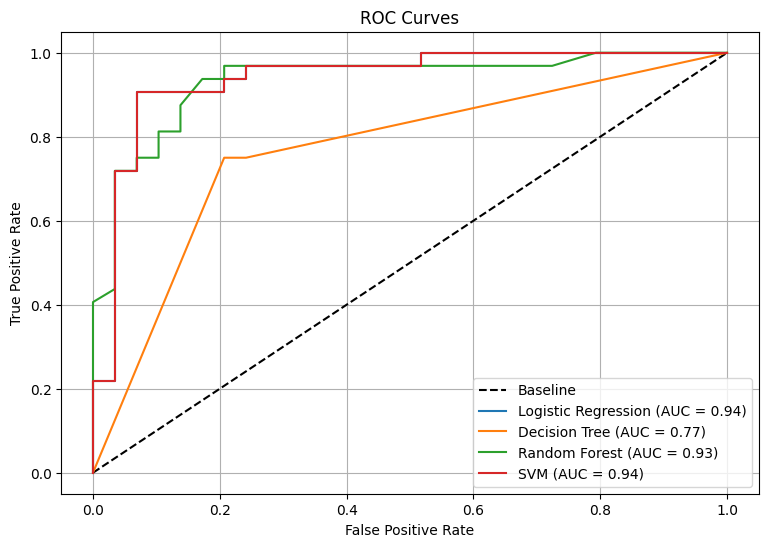

In [123]:
plt.figure(figsize=(9, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')

## Logistic Regression
fpr, tpr, _ = roc_curve(Y_test, lr_Y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
## Decision Tree
fpr, tpr, _ = roc_curve(Y_test, dt_Y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
## Random Forest
fpr, tpr, _ = roc_curve(Y_test, rf_Y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
## SVM
fpr, tpr, _ = roc_curve(Y_test, svm_Y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
